# Testing the WordCloud library

I've chosen to use this library because there is no need to re-invent the wheel. Most naive implementations using bare matplotlib have superimposed words.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import io
from collections import Counter
from wordcloud import WordCloud
import numpy as np

In [2]:
# Let's grab a csv generated by twitterGeoLoc.py
# To reproduce you may need to change this filename
df = pd.read_csv('OutputStreaming_20191026-153306.csv')

In [3]:
def get_word_frequency(dataframe, wordlist):
    """
    Count how many tweets contain a given word
    :param dataframe: Pandas dataframe from the tweepy mining
    :param wordlist: array-like with the keywords
    
    TODO: - drop dependency on numpy?
    """
    word_freq = dict()
    for word in wordlist:
        word_freq[word] = np.where(df['text'].str.contains(word))[0].size
    
    return word_freq

In [4]:
wordlist = io.open('kw.csv').read()
wordlist = wordlist.split(', ')
wf = get_word_frequency(df, wordlist)

Vanilla example of WordCloud functionality

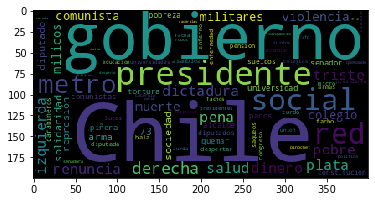

In [5]:
word_cloud = WordCloud().generate_from_frequencies(wf)
plt.imshow(word_cloud)

Now let's make this bigger and with nicer colors

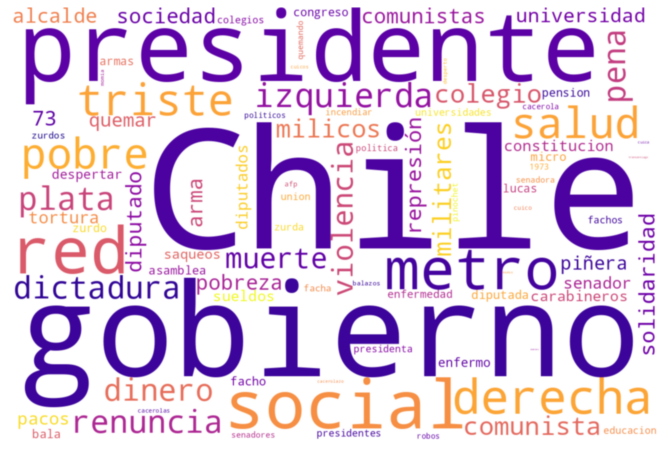

In [9]:
word_cloud = WordCloud(background_color='white', colormap='plasma', width= 1200, height=800).generate_from_frequencies(wf)
fig, ax = plt.subplots(figsize=(12,8))
ax.axis('off')
ax.imshow(word_cloud, interpolation='bicubic');
plt.savefig('wordcloud-test.png')


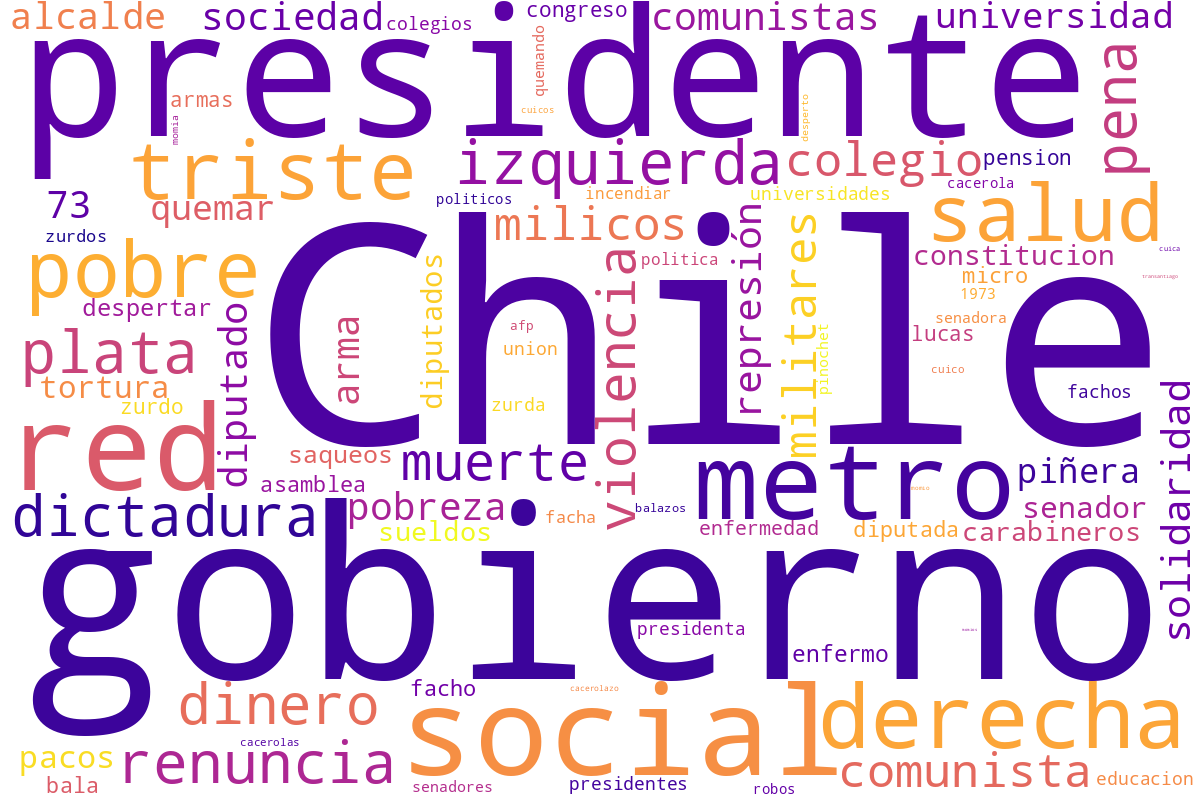

In [13]:
import plotly.graph_objects as go
from PIL import Image
# Create figure
fig = go.Figure()

# Constants
img_width = 1600
img_height = 900
scale_factor = 0.5

# Add invisible scatter trace.
# This trace is added to help the autoresize logic work.
fig.add_trace(
    go.Scatter(
        x=[0, img_width * scale_factor],
        y=[0, img_height * scale_factor],
        mode="markers",
        marker_opacity=0
    )
)

# Configure axes
fig.update_xaxes(
    visible=False,
    range=[0, img_width * scale_factor]
)

fig.update_yaxes(
    visible=False,
    range=[0, img_height * scale_factor],
    # the scaleanchor attribute ensures that the aspect ratio stays constant
    scaleanchor="x"
)

# Add image
fig.update_layout(
    images=[go.layout.Image(
        x=0,
        sizex=img_width * scale_factor,
        y=img_height * scale_factor,
        sizey=img_height * scale_factor,
        xref="x",
        yref="y",
        opacity=1.0,
        layer="below",
        sizing="stretch",
        source=Image.fromarray(word_cloud.to_array()))]
)


# Configure other layout
fig.update_layout(
    width=img_width * scale_factor,
    height=img_height * scale_factor,
    margin={"l": 0, "r": 0, "t": 0, "b": 0},
)

# Disable the autosize on double click because it adds unwanted margins around the image
# More detail: https://plot.ly/python/configuration-options/
fig.show(config={'doubleClick': 'reset'})


Ok, so what I need is a function that receives a dataframe and returns a PIL Image object with the wordcloud

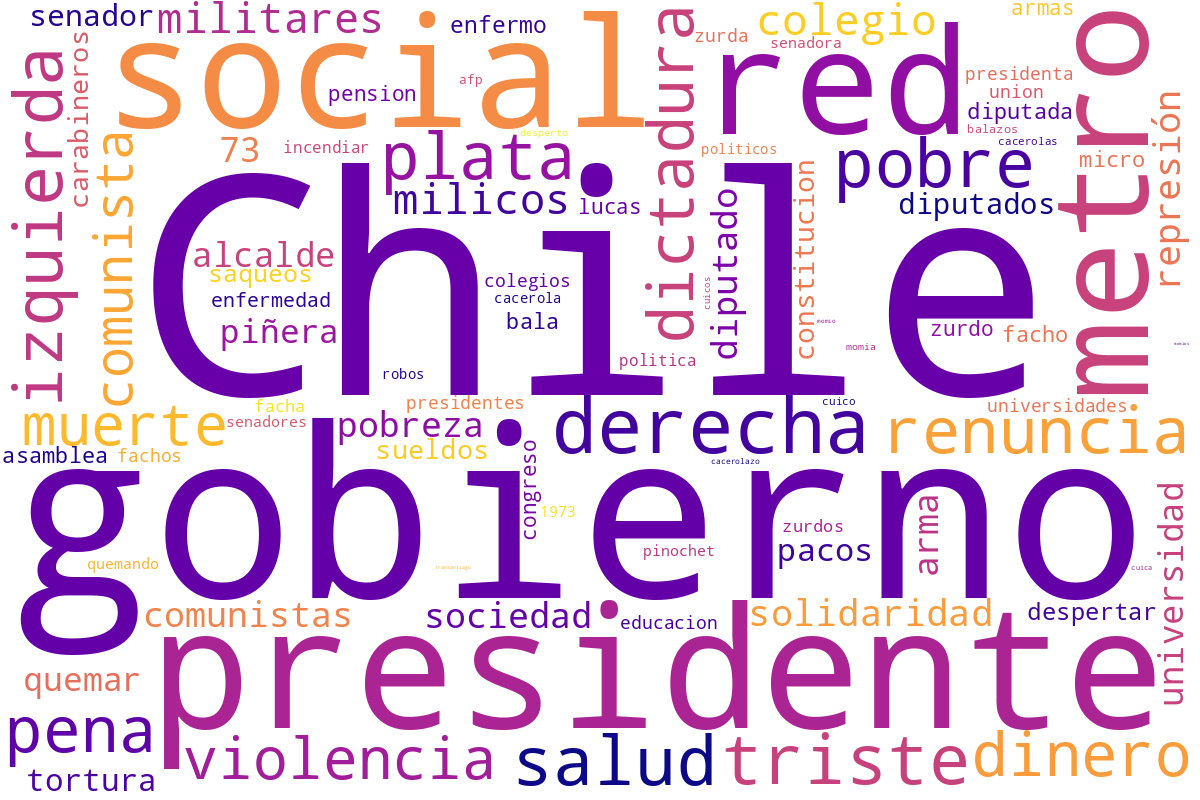

In [17]:
from main import get_keywords
kw = get_keywords()
def create_wordcloud_raster(dataframe, wordlist,
                            wc_kwargs=dict(background_color='white', colormap='plasma', width= 1200, height=800)):
    """
    Generate a wordcloud of the keywords given, wheighted by the number of 
    unique tweets they appear in.
    :param dataframe: Pandas DataFrame object. It must contain a 'text' column with the
    tweets from the stream.
    :param wordlist: list of strings to plot in the word cloud.
    :param wc_kwargs: dict of keyword arguments to give to the WordCloud
    constructor.
    """
    wf = get_word_frequency(dataframe, wordlist)
    word_cloud = WordCloud(**wc_kwargs).generate_from_frequencies(wf)
    return Image.fromarray(word_cloud.to_array())

create_wordcloud_raster(df, kw)